<div align="right">Revision 1 : September 2022</div>

<a href="https://colab.research.google.com/github/dewdotninja/robotics/blob/master/EMMErobo22_IUP/emmerobo22_IUP_hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="left">
<img src="https://raw.githubusercontent.com/dewdotninja/exams/main/feng_heading_en.png" width=400 alt="Feng heading"/>
</p>

#### Department of Mechanical Engineering

### Homework 3
First Semester, Academic Year 2022

<br>**01208583 Robotics**

Type student name - surname and ID in the cell below.

In [ ]:
#Avg Poipet 6010506258

#### Homework problems may depend on the last 3 digits of your student ID

-------xyz (other digits are ignored)

In case any digit in the last 3 are 0, it must be replaced by 5.

#### Examples
    
Student A's ID - 6010555853 results in x = 8, y = 5, z = 3

Student B 's ID - 6010546104 results in x = 1, y = 5, z = 4

Student C 's ID - 6310055032 results in x = 5, y = 3, z = 2
    
These valuess are used for all the problems in the exam where x,y,and/or z appear. In this 
sense, the results from each student should be different even computed using the same methods.

Operations that may be applied to the variables.

$+$ addition

 $-$  subtraction

 $*$  multiplication 

 $/$ division

$**$ raise to the power (For example, x**z means $x^z$)

including math opertions such as $\exp(x)$, $\sin(z*t)$

If a variable is embedded in some digit of a value without any operation symbol, 
just replace that digit. 
<br>For example,  z=8 y = 3 $\Rightarrow$ 12z7 = 1287, 4.3y5 = 4.335

Conditional statement may be used, such as
if x<5 do task A, otherwise do task B

<em>Example: </em> Let $R1 = 1000*x \,\Omega, C1 = 10*y \,\mu F$

<ul>
<li />Student A (x=8, y=5) does this problem with R1 = 8000 $\Omega$, C1 = 50 $\mu$F
<li />Student B (x=1, y=5) does this problem with R1 = 1000 $\Omega$, C1 = 50 $\mu$F
<li />Student C (x=5, y=3) does this problem with R1 = 5000 $\Omega$, C1 = 30 $\mu$F
</ul>


In [ ]:
# You need to install these libraries in the Colab environment
!pip install control

In [1]:
# import libraries you want to use
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

In [2]:
#Assume student ID 6010506258
id_x = 2
id_y = 5
id_z = 8

### (from previous homework)

One device commonly used in industrial machines with rotary motion, such as robotic joints, is called a Harmonic Drive from a group of companies Harmonic Drive LLC. motor Hereafter, for the convenience of writing, it is abbreviated as the HDM system.

Figure 1 shows the structure of the HDM mechanism consisting of three parts: a circular spline, a flexspline, and an elliptical wave generator. The wave generator is connected to the shaft of a motor that rotates at high speed. A round ring has teeth inside. Between the two are separated by an elastic ring with teeth on the outside.

<p align="center">
<img src="https://drive.google.com/uc?id=1PtcGtTJ2iv81nLHz5Gb5mNnGeM_d5i4c" width=300 alt="Figure 1"/>
</p>
<div align="center"><b>Figure 1 HDM structure (https://www.harmonicdrive.net/)</b></div>

When drawing a schematic diagram of the HDM device connected to the DC motor, it will be shown in Figure 2. Left side is the motor's electrical system. and on the right is the mechanical system of the harmonic drive, represented by a soft shaft thru-axle gearbox with a hardness of k.

<p align="center">
<img src="https://drive.google.com/uc?id=1OP3LsMAgsHQ5uYdmVLQFHQLq55J-kYd7" width=550 alt="Figure 2"/>
</p>
<div align="center"><b>Figure 2 HDM block diagram </b></div>

Define
$$
p_l(s) = J_ls^2 + B_ls + k \tag{1}
$$
$$
p_m(s) = J_ms^2 + B_ms + k \tag{2}
$$
Overall transfer function of HDM can be described as 
$$
P(s) = \frac{\theta_l(s)}{V(s)} = \frac{k_mk}{p_m(s)p_l(s)(Ls+R)-k^2(Ls+R)+rk_mk_bsp_l(s)} \tag{3}
$$
assign parameter values (with x, y, z from your student ID)

```python
	km = (y+z)*100  # torque constant
	kb = 1  # back EMF constant
	k = 1000 # torsional stiffness of harmonic drive
	r = x   # gear ratio
	R = 1  # armature resistance
	L = 0.1 # armature inductance
	Jm = (x+y)  #  motor inertia
	Bm = 0.01*y  # motor shaft friction
	Jl = (x+z)  # load inertia
	Bl = 0.01*z  # load friction
```

Write code to create a plant transfer function of HDM as in (3) 

#### Copy your solution from HW2


In [3]:
km = (id_y+id_z)*100  # torque constant
kb = 1  # back EMF constant
k = 1000 # torsional stiffness of harmonic drive
r = id_x   # gear ratio
R = 1  # armature resistance
L = 0.1 # armature inductance
Jm = (id_x+id_y)  #  motor inertia
Bm = 0.01*id_y  # motor shaft friction
Jl = (id_x+id_z)  # load inertia
Bl = 0.01*id_z  # load friction	
s = ctl.tf("s")
p_l = Jl*s**2 + Bl*s + k
p_m = Jm*s**2 + Bm*s + k
P = km*k/(p_m*p_l*(L*s+R) - (k**2)*(L*s+R) + r*km*kb*s*p_l)
P

TransferFunction(array([1300000]), array([7.00000000e+00, 7.01060000e+01, 2.77010604e+04, 1.72210040e+04,
       2.60013000e+06, 0.00000000e+00]))

#### P 1 (10 points) 

Figure 3 shows cascaded PID structure (for a robot joint driven by simple 
DC motor) to improve closed-loop performance.  

<p align="center">
<img src="https://drive.google.com/uc?id=1uUQjWyLEXP1XmwUTk5KpU6Tcr84k61G7" width=550 alt="Figure 4"/>
</p>
<div align="center"><b>Figure 3 cascaded PID control</b></div>

Extract the integrator from the HDM plant in HW2 (in above cell) to use it in the outer loop 
as shown in Figure 3. The rest of the plant transfer function is in the inner-loop. For both 
loops, use the following PID equation 

$$
C(s) = K_p + \frac{K_i}{s} + \frac{NK_d}{N/s+1}
$$

<b>Grade rubric :</b>

1. Simulate the step response of closed-loop system in Figure 3 (4 points)
2. Suppose we want to cast the specifications from HW 2 so that loopshaping procedure can 
be performed (with adjustable PID parameters instead of zeros/pole. Determine the resulting 
transfer function $C(s)$ and $P(s)$ used as arguments for lshape() (4 points)
3. Adjust PID parameters to conform to the specifications in your HW 2 (2 points). 

#### Solution

Create a PID function to be used in simulation.

In [4]:
def PID(kp, ki,kd,N):
    s = ctl.tf("s")
    C = kp + ki/s + kd*s*N/(s+N)
    return C

Consider the HDM plant from P1. Factorize it as 
$$
P(s) = P_{inner}(s)\frac{1}{s}
$$
So can find $P_{inner}(s)$ from
$$
P_{inner}(s) = sP(s)
$$

In [5]:
P_inner = ctl.minreal(s*P)
P_inner

1 states have been removed from the model


TransferFunction(array([185714.28571429]), array([1.00000000e+00, 1.00151429e+01, 3.95729434e+03, 2.46014343e+03,
       3.71447143e+05]))

Construct cascaded PID to simulate the response.

In [6]:
# It may be quite tedious to get a set of decent parameters. 
Kp1 = 2.3
Ki1 = 0.8
Kd1 = 0.6
N1 = 20
Kp2 = 1.6
Ki2 = 1.3
Kd2 = 0.1
N2 = 20

0 states have been removed from the model


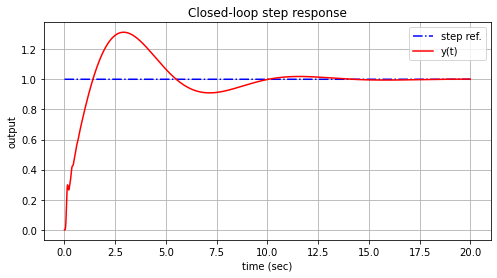

In [7]:
C_pid1 = PID(Kp1,Ki1,Kd1,N1)
L_inner = C_pid1*P_inner
T_inner = ctl.feedback(L_inner)
C_pid2 = PID(Kp2,Ki2,Kd2,N2)
L_outer = C_pid2*T_inner*(1/s)
T_outer = ctl.minreal(ctl.feedback(L_outer))
tvec_5 = np.arange(0,20,0.001)
t_5, y_5 = ctl.step_response(T_outer,tvec_5)
r_5 = np.ones(t_5.shape)
plt.figure(figsize=(8,4))
plt.plot(t_5,r_5,'b-.',t_5,y_5,'r-')
plt.grid('True')
plt.xlabel('time (sec)')
plt.ylabel('output')
plt.legend(['step ref.','y(t)'])
plt.title('Closed-loop step response')
plt.show()

Adjust PID parameters for both loops to meet the specs in P2. From figure 3, we see that $C(s)$ and $P(s)$ that are supplied as arguments of lshape() are 


$$
C(s) = C_{pid2}(s)T_{inner}(s)
$$
$$
P(s) = \frac{1}{s}
$$

In [9]:
def lshape(C,P, lf, lfb, hf, hfb, pm ):
    assert lf > 0   # avoid bad values
    assert lfb > 0
    assert hf > lf
    assert hfb < 0
    assert 0 < pm < 90
    L = C*P # form loop transfer function
    # create a suitable range of frequency from lf, hf
    lf_log10 = np.log10(lf)
    w_start = np.floor(lf_log10)-1
    hf_log10 = np.log10(hf)
    w_end = np.ceil(hf_log10)+1
    w = np.logspace(w_start,w_end, 1000)
    
    # frequency response of L
    Lmag, Lph, om = ctl.freqresp(L, w)
    Lmag_db = np.squeeze(20*np.log10(Lmag))
    Lph_deg = np.squeeze(np.degrees(Lph))
    
    # create bound vectors
    lf_mask = np.where(om<lf, lfb, 0)
    hf_mask = np.where(om<hf, 0, hfb)
    lf_bnd = lf_mask*np.ones(om.shape)
    hf_bnd = hf_mask*np.ones(om.shape)
    
    # check whether violation occurs
    lf_idxv = np.where(om>lf)
    lf_idx = lf_idxv[0][0]   # find index of low-freq region
    hf_idxv = np.where(om<hf)
    hf_idx = hf_idxv[0][-1]  # find index of high-freq region
    lfmag = Lmag_db[:lf_idx]
    hfmag = Lmag_db[hf_idx:]
    if min(lfmag)<lfb:
        lf_legend = "LF bound (violated)"
    else:
        lf_legend = "LF bound"
    if max(hfmag)>hfb:
        hf_legend = "HF bound (violated)"
    else:
        hf_legend = "HF bound"    
    
    # desired phase margin vectors
    pmvec = (pm-180)*np.ones(om.shape)
    
    # compute gain/phase margins
    g_margin, ph_margin, wgm, wpm = ctl.margin(L)
    ph_at_crossover = (ph_margin-180)
    # Loopshaping plot
    fig, (ax1, ax2) = plt.subplots(2, figsize=(8,8))
    fig.suptitle('$L(j\omega)$ v.s. bounds')
    ax1.semilogx(om, Lmag_db,'k-', om, lf_bnd, 'm-.', om, hf_bnd,'b-.')
    ax1.legend(["$|L(j\omega)|$",lf_legend,hf_legend],loc="lower left")
    ax1.grid(True)
    ax1.set_ylabel('magnitude (dB)')
    
    ax2.semilogx(om, Lph_deg,'k-',om, pmvec,'b-', wpm, ph_at_crossover,'r*')
    if ph_margin > pm:
        pmtext = "phase margin = " + str(round(ph_margin)) + " degrees"
    else:
        pmtext = "phase margin = " + str(round(ph_margin)) + " degrees (violated)"
        
    ax2.text(wpm,ph_at_crossover,pmtext)
    
    dpmtext = "Desired PM (" + str(pm) + " degrees)"
    ax2.set_xlabel('frequency (rad/s)')
    ax2.set_ylabel('phase (deg)')
    ax2.legend(["$\measuredangle L(j\omega)$",dpmtext],loc="lower left")
    ax2.grid(True)    
    
    # plot magnitude of S and T v.s bounds
    S = 1/(1+L)
    T = L/(1+L)
    
    # frequency responses of S and T
    Smag, Sph, om = ctl.freqresp(S, w)
    Tmag, Tph, om = ctl.freqresp(T, w)
    
    Smag_db = np.squeeze(20*np.log10(Smag))
    Tmag_db = np.squeeze(20*np.log10(Tmag))
   
    # check whether violation occurs
    lf_idxv = np.where(om>lf)
    lf_idx = lf_idxv[0][0]   # find index of low-freq region
    hf_idxv = np.where(om<hf)
    hf_idx = hf_idxv[0][-1]  # find index of high-freq region
    lfSmag = Smag_db[:lf_idx]
    hfTmag = Tmag_db[hf_idx:]
    if max(lfSmag)>-lfb:
        lf_legend = "LF bound (violated)"
    else:
        lf_legend = "LF bound"
    if max(hfTmag)>hfb:
        hf_legend = "HF bound (violated)"
    else:
        hf_legend = "HF bound"    
        
    # create data vector for stability bound in mid freq region
    
    om_mid = om[lf_idx:hf_idx]
    pm_r = np.radians(pm)
    x = np.sin(0.5*(np.pi - pm_r))/(np.sin(pm_r)) 
    x = 20*np.log10(x)
    bnds_mid = x*np.ones(om_mid.shape)
    
    ST_peak = max(max(Smag_db),max(Tmag_db))
    if ST_peak > x:
        mf_legend = "Stability bound (violated)"
    else:
        mf_legend = "Stability bound"
    
    plt.figure(figsize=(8,4))
    plt.semilogx(om,Smag_db,'k-',om,Tmag_db,'g-',om,-lf_bnd,'m-.',om,hf_bnd,'b-.',om_mid,bnds_mid,'r-.')
    plt.xlabel('frequency (rad/s)')
    plt.ylabel('magnitude (dB)')
    plt.legend(["$|S(j\omega)|$","$|T(j\omega)|$",lf_legend,hf_legend, mf_legend])
    plt.grid(True)
    plt.title('$|S(j\omega)|$ and $|T(j\omega)|$ v.s. bounds')
    plt.show()


In [11]:
# From student ID x = 2, y=5, z = 8

S_bnd_abs = 0.01*id_y

# compute bounds
S_bnd = 20*np.log10(S_bnd_abs)
L_bnd = -S_bnd
print("Low frequency bound on S = " + str(S_bnd) + " dB")
print("Low frequency bound on L = " + str(L_bnd) + " dB")

Low frequency bound on S = -26.020599913279625 dB
Low frequency bound on L = 26.020599913279625 dB


Design criteria for this problem can be casted as

1. An integrator must be in $L(s)$. ($P(s)$ already has one, though we may want another one in $C(s)$ to achieve steeper $|L(j\omega)|$ in low-frequency region
2. In low frequency region below 0.2 rad/s, $|L(j\omega)|$ should lie below 26 dB
3. It can be observed from **P1.3** that the lower-frequency lightly-damped mode happens around 10 rad/s, so we choose hf=10 and hfb = -3 dB.
4. Phase margin at least 30 degrees.

In [12]:
lf = 0.2
lfb = 26
hf = 10 
hfb = -3
pm = 30

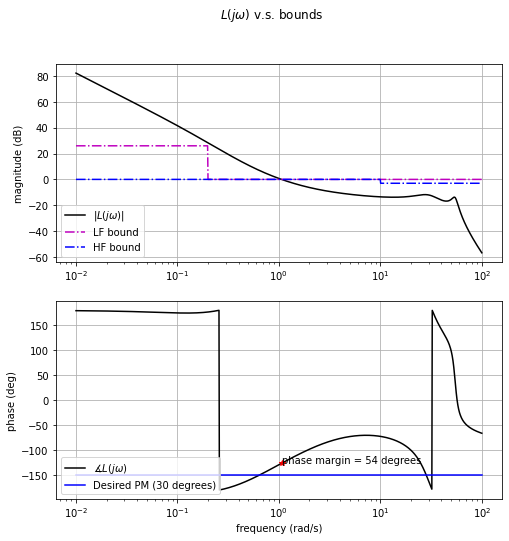

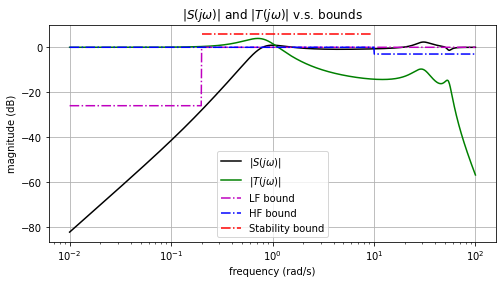

In [13]:
C_5 = C_pid2*T_inner
P_5 = 1/s
lshape(C_5, P_5, lf, lfb, hf, hfb, pm)

From some experiment, we found that $Kp_1 = 2.3, Ki_1 = 0.8, Kd_1 = 0.6, N_1 = 20$ และ $Kp_2 = 1.6, Ki_2 = 1.3, Kd_2 = 0.1, N_2 = 20$  made lshape() meet the specs in HW2.